# Wolfram Cellular Automata

In [6]:
%matplotlib inline
import functools as ft
import itertools as it
import math
import time

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [17]:
def bit_fmt(x, bit_len):
    return '{0:0{bit_len}b}'.format(x, bit_len=bit_len)

In [18]:
bit_fmt(30, 8)

'00011110'

In [19]:
bit_fmt(30, 16)

'0000000000011110'

In [20]:
BIT_PATTERNS = [''.join(x) for x in it.product('10', repeat=3)]

In [21]:
BIT_PATTERNS

['111', '110', '101', '100', '011', '010', '001', '000']

In [22]:
def make_rule(x, patterns=BIT_PATTERNS):
    max_val = 2 ** len(patterns) - 1
    if x > max_val:
        raise ValueError(f'x must be less than {max_val}')
    bits = '{0:0{bit_len}b}'.format(x, bit_len=len(patterns))
    return {bp: bx for bp, bx in zip(patterns, bits)}

In [23]:
def key_func_gen(keylen):
    key_template = '{}' * keylen
    reach = math.floor(keylen / 2)
    def key_func(arr, midpoint):
        return key_template.format(*arr[midpoint - reach : midpoint + reach + 1])
    return key_func

In [24]:
a = np.ones(10, dtype=int).astype(str)
key_func_gen(3)(a[:5], 3)

'111'

In [25]:
def run_wolfram(rules, iterations=10):
    if iterations % 2 != 0:
        iterations += 1
    
    width = 2 * iterations + 3
    result = np.zeros((iterations, width), dtype=int)
    result[0][math.floor(width / 2)] = 1
    key_length = len(list(rules.keys())[0])
    reach = math.floor(key_length / 2)
    key_func = key_func_gen(key_length)
    
    for i in range(1, iterations):
        for j in range(reach, width - reach):
            result[i][j] = rules[key_func(result[i - 1], j)]
    return result

# Rule 30
http://mathworld.wolfram.com/Rule30.html

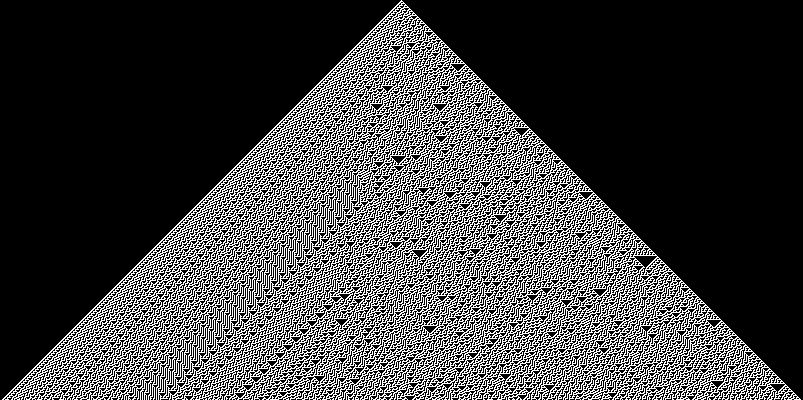

In [26]:
data = run_wolfram(make_rule(30), iterations=400)
im = Image.new('1', data.shape[::-1])
im.putdata(data.flatten())
im

# Rule 126
http://mathworld.wolfram.com/Rule126.html

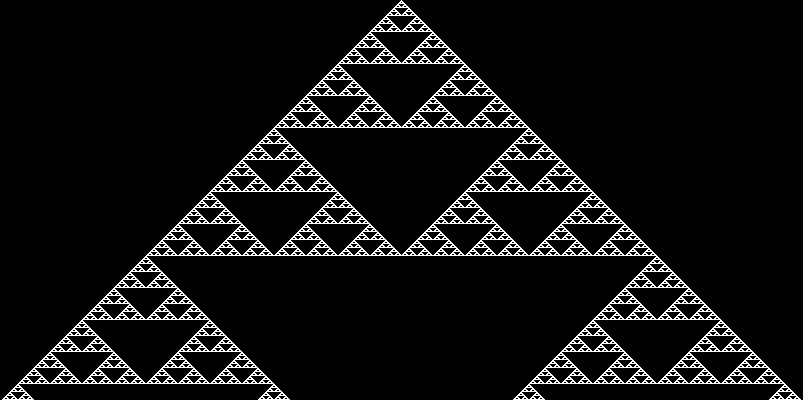

In [27]:
data = run_wolfram(make_rule(126), iterations=400)
im = Image.new('1', data.shape[::-1])
im.putdata(data.flatten())
im

# Rule 151

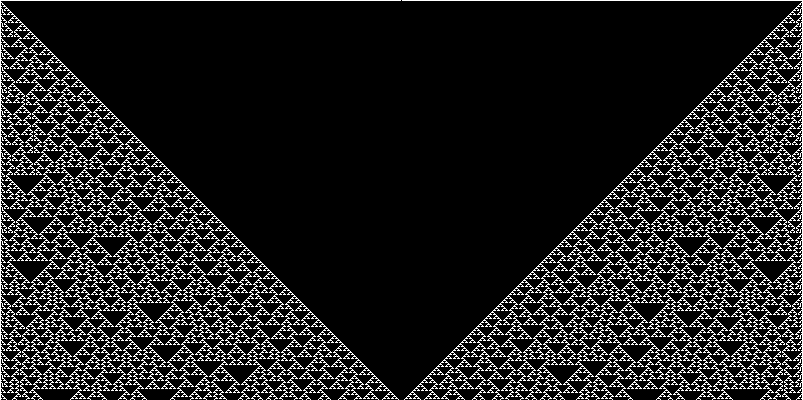

In [28]:
data = run_wolfram(make_rule(151), iterations=400)
im = Image.new('1', data.shape[::-1])
im.putdata(np.where(data.flatten() == 1, 0, 1))
im

# Wolfram with 5 bits

In [29]:
BIT_PATTERNS_5 = [''.join(x) for x in it.product('10', repeat=5)]

In [30]:
BIT_PATTERNS_5

['11111',
 '11110',
 '11101',
 '11100',
 '11011',
 '11010',
 '11001',
 '11000',
 '10111',
 '10110',
 '10101',
 '10100',
 '10011',
 '10010',
 '10001',
 '10000',
 '01111',
 '01110',
 '01101',
 '01100',
 '01011',
 '01010',
 '01001',
 '01000',
 '00111',
 '00110',
 '00101',
 '00100',
 '00011',
 '00010',
 '00001',
 '00000']

In [32]:
def run_wolfram_5(dictator, iterations=16):
    if iterations % 2 != 0:
        iterations += 1
    
    arr_len = 2 * iterations + 3
    data = np.zeros((iterations, arr_len), dtype=int)
    data[0][math.floor(arr_len / 2)] = 1
    n = math.floor(5 / 2)
    
    for i in range(1, iterations):
        arr = np.zeros(len(data[i]))
        for j in range(n, len(arr) - n):
            key = ''.join(str(data[i-1][j+x]) for x in range(n, -n-1, -1))
            arr[j] = dictator[key]
        data[i] = arr
    return data

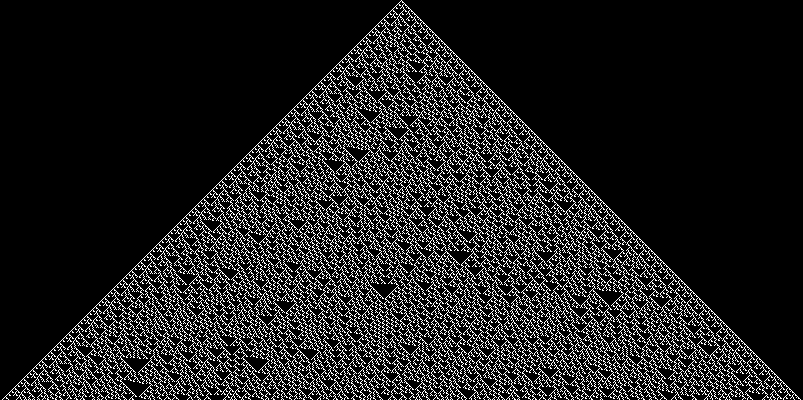

In [33]:
data = run_wolfram_5(make_rule(300, BIT_PATTERNS_5), 400)
im = Image.new('1', data.shape[::-1])
im.putdata(data.flatten())
im

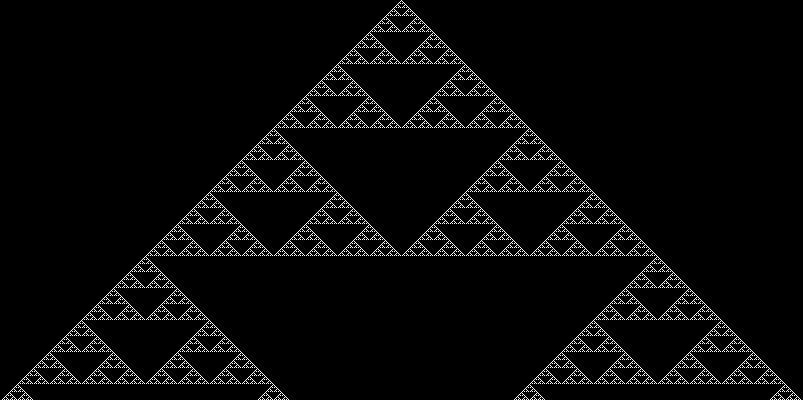

In [34]:
data = run_wolfram_5(make_rule(260, BIT_PATTERNS_5), 400)
im = Image.new('1', data.shape[::-1])
im.putdata(data.flatten())
im